<div class="alert alert-danger" role="alert">
<h1 align="center"><font size = 14>LinearRegression</font></h1>
<h4 align="center">September 15-2024<h4>
<h3 align="center">Armin Amani</h3>

<div class="alert alert-danger" role="alert">
📤 Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

<div class="alert alert-danger" role="alert"> 
💾 Read CSV file and check the structure of the file

In [2]:
df = pd.read_csv('houses.csv')
df

,size(sqft),bedrooms,floors,age,price
0,952.0,2.0,1.0,65.0,271.5
1,1244.0,3.0,1.0,64.0,300.0
2,1947.0,3.0,2.0,17.0,509.8
3,1725.0,3.0,2.0,42.0,394.0
4,1959.0,3.0,2.0,15.0,540.0
...,...,...,...,...,...
95,1224.0,2.0,2.0,12.0,329.0
96,1432.0,2.0,1.0,43.0,388.0
97,1660.0,3.0,2.0,19.0,390.0
98,1212.0,3.0,1.0,20.0,356.0


In [3]:
df.head(10)

,size(sqft),bedrooms,floors,age,price
0,952.0,2.0,1.0,65.0,271.5
1,1244.0,3.0,1.0,64.0,300.0
2,1947.0,3.0,2.0,17.0,509.8
3,1725.0,3.0,2.0,42.0,394.0
4,1959.0,3.0,2.0,15.0,540.0
5,1314.0,2.0,1.0,14.0,415.0
6,864.0,2.0,1.0,66.0,230.0
7,1836.0,3.0,1.0,17.0,560.0
8,1026.0,3.0,1.0,43.0,294.0
9,3194.0,4.0,2.0,87.0,718.2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   size(sqft)  100 non-null    float64
 1   bedrooms    100 non-null    float64
 2   floors      100 non-null    float64
 3   age         100 non-null    float64
 4   price       100 non-null    float64
dtypes: float64(5)
memory usage: 4.0 KB


In [5]:
df.isnull().sum()

size(sqft)    0
bedrooms      0
floors        0
age           0
price         0
dtype: int64

<div class="alert alert-danger" role="alert"> 
🔎 Data Visualize

c:\Users\Beethoven\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Beethoven\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Beethoven\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Beethoven\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categoric

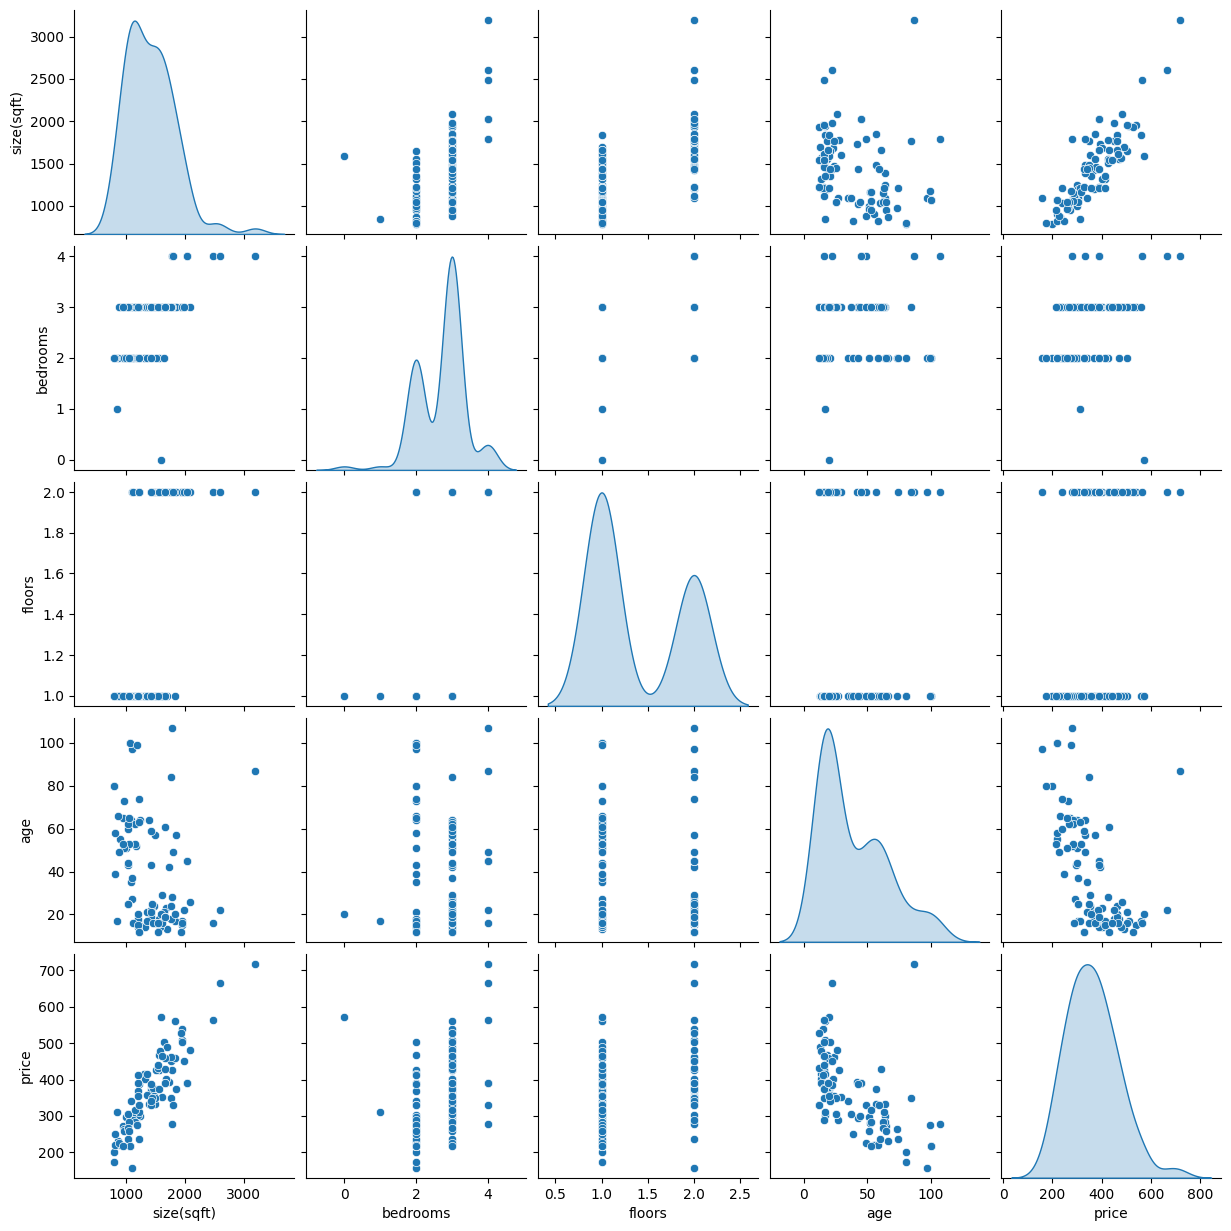

In [6]:
sns.pairplot(data=df,diag_kind='kde')

c:\Users\Beethoven\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Beethoven\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='size(sqft)', ylabel='price'>

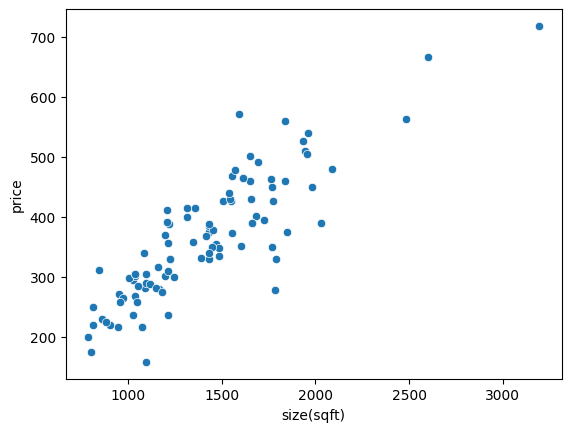

In [7]:
sns.scatterplot(data=df,x='size(sqft)',y='price')

* **when the size of the house increases,the price of that house increse too**

c:\Users\Beethoven\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Beethoven\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='bedrooms', ylabel='price'>

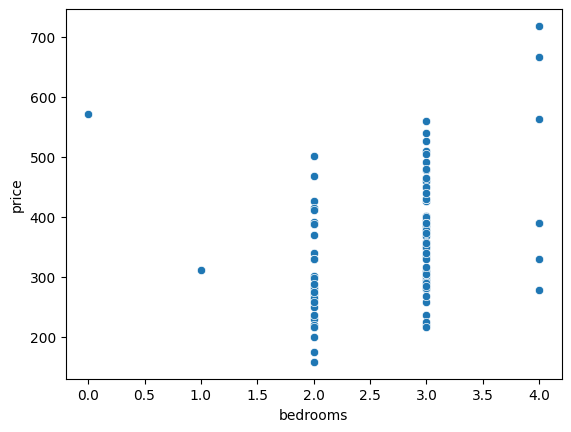

In [8]:
sns.scatterplot(data=df,x='bedrooms',y='price')

* **when the number of bedrooms is below the 3 like 2 bedrooms we have the price that below the 200 and at 4 bedrooms we have house more than 700**

c:\Users\Beethoven\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Beethoven\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='floors', ylabel='price'>

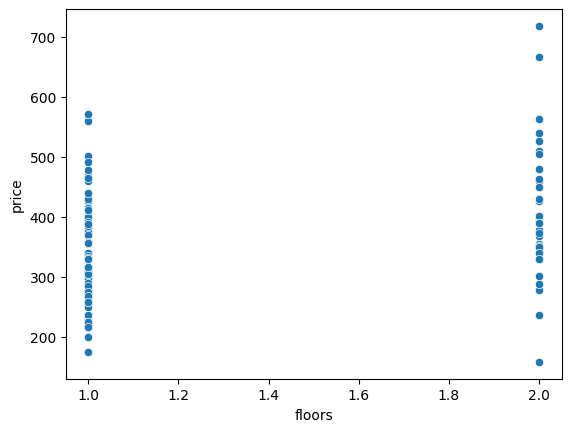

In [9]:
sns.scatterplot(data=df,x='floors',y='price')

* **the price of houses with 2 floors is more than price of houses with just a floors and in 2 floors we have houses with 600 and more than 600 and 700 too**

c:\Users\Beethoven\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Beethoven\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='age', ylabel='price'>

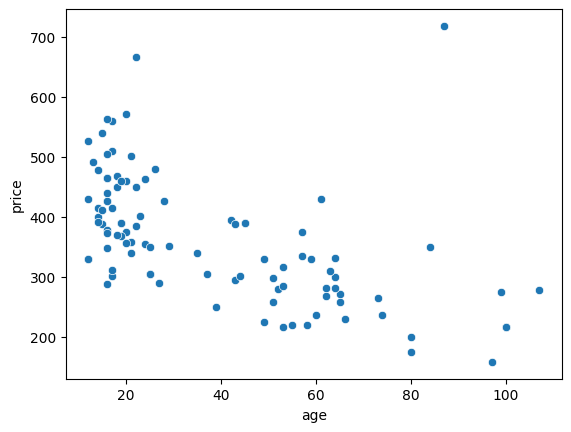

In [10]:
sns.scatterplot(data=df,x='age',y='price')

* **when the age of the houses gonna higher the price of that houses gonna decreases**

<div class="alert alert-danger" role="alert"> 
🔎 the data should have normal distribution, when we want to use linearregression

c:\Users\Beethoven\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Beethoven\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


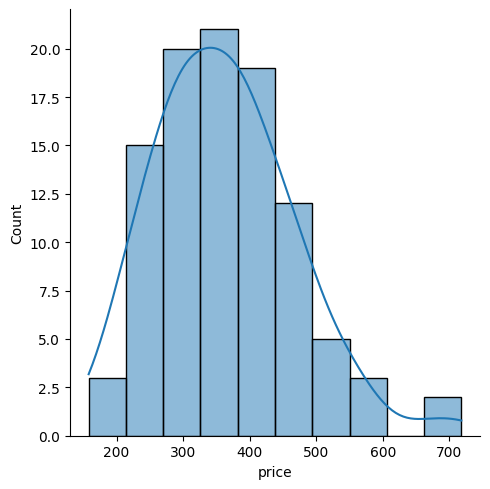

In [11]:
sns.displot(data=df,x='price',kde=True)

In [12]:
print(f"skewness of the data is : {np.round(df['price'].skew(),3)}")

skewness of the data is : 0.66


<Axes: >

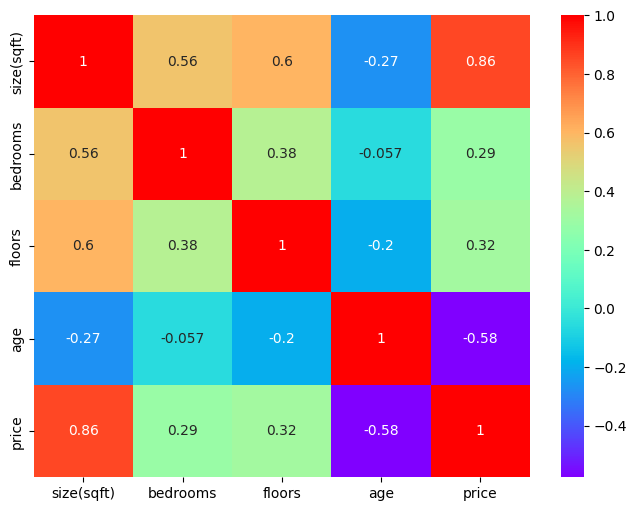

In [13]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True,cmap=plt.cm.rainbow)

* **the features with more than 50 percent are most important like size(sqft) and age.**

<div class="alert alert-danger" role="alert"> 
🔎 Seperate X and Y

In [14]:
X = df.drop('price',axis=1)
X

,size(sqft),bedrooms,floors,age
0,952.0,2.0,1.0,65.0
1,1244.0,3.0,1.0,64.0
2,1947.0,3.0,2.0,17.0
3,1725.0,3.0,2.0,42.0
4,1959.0,3.0,2.0,15.0
...,...,...,...,...
95,1224.0,2.0,2.0,12.0
96,1432.0,2.0,1.0,43.0
97,1660.0,3.0,2.0,19.0
98,1212.0,3.0,1.0,20.0


In [15]:
Y = df['price']
Y

0     271.5
1     300.0
2     509.8
3     394.0
4     540.0
      ...  
95    329.0
96    388.0
97    390.0
98    356.0
99    257.8
Name: price, Length: 100, dtype: float64

<div class="alert alert-danger" role="alert"> 
🔎 train and test split

In [16]:
X_train ,X_test ,Y_train ,Y_test = train_test_split(X,Y,test_size=0.2,random_state=101)

In [17]:
print(f"shape of X_train is : {X_train.shape}")
print(f"shape of X_test is : {X_test.shape}")
print(f"shape of Y_train is : {Y_train.shape}")
print(f"shape of Y_train is : {Y_test.shape}")

shape of X_train is : (80, 4)
shape of X_test is : (20, 4)
shape of Y_train is : (80,)
shape of Y_train is : (20,)


<div class="alert alert-danger" role="alert"> 
🔎 Creat the model

In [18]:
LR = LinearRegression()
LR

LinearRegression()

In [19]:
LR.fit(X_train,Y_train)

LinearRegression()

In [20]:
print(f"theta is : {LR.coef_}")
print("-----------------------------------------------\n-----------------------------------------------")
print(f"theta0 is : {LR.intercept_}")

theta is : [  0.26618701 -33.38750502 -67.37775474  -1.36733828]
-----------------------------------------------
-----------------------------------------------
theta0 is : 222.3200392079512


<div class="alert alert-danger" role="alert"> 
🔎 prediction

In [21]:
y_pred = LR.predict(X_test)
y_pred

array([324.03661268, 298.40675938, 237.05210788, 237.05210788,
       463.06056408, 329.92190094, 403.29302292, 372.39538357,
       227.9085243 , 432.84391619, 353.09288785, 296.19540245,
       485.38783149, 615.75310485, 402.17588724, 293.51985794,
       453.81682521, 486.06581842, 389.14639819, 226.07025406])

<div class="alert alert-danger" role="alert"> 
🔎 Loss function

In [22]:
MAE = metrics.mean_absolute_error(Y_test,y_pred)
MAE

19.05845665984375

In [23]:
MSE = metrics.mean_squared_error(Y_test,y_pred)
MSE

571.3096278300106

In [24]:
RMSE = np.sqrt(MSE)
RMSE

23.902084173352137

<div class="alert alert-danger" role="alert"> 
🔎 Data Scalling

In [25]:
scaler = StandardScaler()
scaler

StandardScaler()

In [26]:
scaler.fit(X_train)

StandardScaler()

In [27]:
X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)

In [28]:
print(f"x_test_s.shape : {X_test_s.shape}")
print(f"x_train_s.shape : {X_train_s.shape}")

x_test_s.shape : (20, 4)
x_train_s.shape : (80, 4)


<div class="alert alert-danger" role="alert"> 
🔎 sketch Loss function

In [29]:
def loss_func(x,y,theta1,theta0):
    m=x.shape[0]
    h=np.dot(x,theta1)+theta0
    error=h - y
    j=1/(2*m) * np.sum(error**2)
    return j,error

<div class="alert alert-danger" role="alert"> 
🔎 Linear_GD

In [30]:
j_hist = [0.01]

In [31]:
n_iter = 100000
j_h = np.zeros((n_iter+1,2))

In [32]:
def gradient(alpha,x,y,n_iter):
    m=x.shape[0]
    theta1=np.ones(x.shape[1])
    theta0=0
    
    for iter in range(0,n_iter):
        j,error=loss_func(x,y,theta1,theta0)
        
        j_hist.append(j)
        print("iter:",iter,"j:",j)

        j_h[iter,0] = iter
        j_h[iter,1] = j

        if(j_hist[iter+1]-j_hist[iter]==0):
            break
        dj_dtheta1=1/m *np.dot(x.T,error)
        dj_dtheta0=1/m * np.sum(error)
        theta1=theta1-alpha*dj_dtheta1
        theta0=theta0-alpha*dj_dtheta0
    return theta1,theta0

In [33]:
theta1,theta0=gradient(alpha=((0.001)*3)*3,x=X_train_s,y=Y_train,n_iter=n_iter)

iter: 0 j: 70320.61772213987
iter: 1 j: 69054.69684710915
iter: 2 j: 67812.39379454475
iter: 3 j: 66593.24852604874
iter: 4 j: 65396.81056071867
iter: 5 j: 64222.63875788031
iter: 6 j: 63070.30110531843
iter: 7 j: 61939.37451285059
iter: 8 j: 60829.444611094965
iter: 9 j: 59740.10555528633
iter: 10 j: 58670.95983400003
iter: 11 j: 57621.61808264705
iter: 12 j: 56591.698901608266
iter: 13 j: 55580.82867887901
iter: 14 j: 54588.641417100094
iter: 15 j: 53614.77856485411
iter: 16 j: 52658.88885211028
iter: 17 j: 51720.62812970394
iter: 18 j: 50799.65921274095
iter: 19 j: 49895.65172781971
iter: 20 j: 49008.28196396744
iter: 21 j: 48137.232727189934
iter: 22 j: 47282.19319853734
iter: 23 j: 46442.85879559111
iter: 24 j: 45618.93103728037
iter: 25 j: 44810.11741193831
iter: 26 j: 44016.1312485123
iter: 27 j: 43236.691590843504
iter: 28 j: 42471.52307493443
iter: 29 j: 41720.35580912542
iter: 30 j: 40982.92525710311
iter: 31 j: 40258.972123666164
iter: 32 j: 39548.24224317597
iter: 33 j: 388

<div class="alert alert-danger" role="alert"> 
🔎 plot the LR diagram

In [34]:
for i in range(X.shape[0]):
    y_prediction = X_test_s[:,[0]] * theta1[0] + theta0
    y_pred = X_test_s[:,[0]]*theta1[0]+theta0 + X_test_s[:,[1]]*theta1[1]+theta0 + X_test_s[:,[2]]*theta1[2]+theta0 + X_test_s[:,[3]]*theta1[3]+theta0

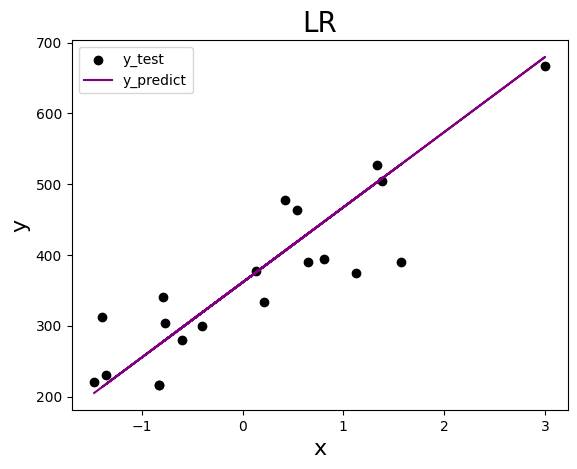

In [35]:
plt.scatter(X_test_s[:,[0]],Y_test,color='k',label='y_test')
plt.plot(X_test_s[:,[0]],y_prediction,color='purple',label='y_predict')
plt.title('LR',fontsize=20)
plt.xlabel('x',fontsize=16)
plt.ylabel('y',fontsize=16)
plt.legend()
plt.show()

<div class="alert alert-danger" role="alert"> 
🔎 Learning plot

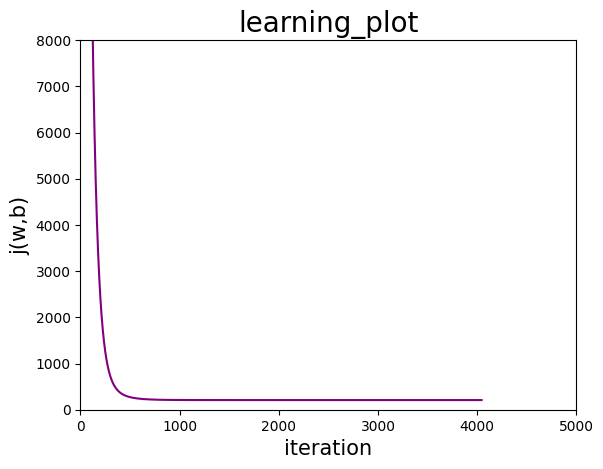

In [36]:
plt.plot(j_h[:4045,[0]],j_h[:4045,[1]],color='purple')
plt.xlim([0,5000])
plt.ylim([0,8000])
plt.title('learning_plot',fontsize=20)
plt.xlabel('iteration',fontsize=15)
plt.ylabel('j(w,b)',fontsize=15)
plt.show()

In [37]:
j,_ = loss_func(X_test_s,Y_test,theta1,theta0)

In [38]:
MSE

571.3096278300106

In [39]:
print(f"j(theta0,theta1) for the new data is : {j}")

j(theta0,theta1) for the new data is : 285.6548136065473
